In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.dummy import DummyClassifier


# Constants
from dlomix.constants import ALPHABET_UNMOD

# Baselines

## Preprocessed data

### Random predictor

In [3]:
processed_data = pd.read_parquet("/mnt/c/Users/Florian/Desktop/Uni/MSc/FoPr/preprocessed_pcp_data.parquet")

In [4]:
# remove UNIMOD sequences
processed_data = processed_data[~processed_data.modified_sequence.str.contains('UNIMOD')]

In [5]:
# encode the sequences
processed_data.modified_sequence = processed_data.modified_sequence.apply(list).apply(lambda x: np.array([ALPHABET_UNMOD[aa] for aa in x]))

In [6]:
# determine the maximum sequence length in the dummy-dataset
max_len = processed_data.modified_sequence.apply(len).max()
max_len

40

In [7]:
# pad sequences to max length with 0s
processed_data.modified_sequence = processed_data.modified_sequence.apply(lambda x: np.pad(x, (0, max_len - len(x)), constant_values=0))

In [8]:
# define minimum and maximum charge state
min_charge_state = 1
max_charge_state = 6

In [9]:
# Generate random charge states for each sequence
np.random.seed(42)
random_predictions = np.random.randint(min_charge_state, max_charge_state+1, size=len(processed_data))
processed_data['random_prediction'] = random_predictions
processed_data.head()

,modified_sequence,precursor_charge,precursor_intensity,charge_by_max_intensity,max_intensity,charge_by_avg_intensity,avg_intensity,one_hot_most_abundant_charge,charge_state_vector,normalized_intensity_distribution,random_prediction
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...","[12746190.0, 2009914.0, 12746190.0, 791369.9, ...",2,84118390.0,2,4.312718e+07,"[0, 1, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]","[0.0014942136737631886, 0.977159622342211, 0.0...",4
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[5944787.0, 5944787.0, 8502878.0, 6425294.0, 8...",2,8824163.0,2,7.635637e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",5
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2]","[3067981.0, 3067981.0, 3067981.0, 3067981.0]",2,3067981.0,2,3.067981e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[11913300.0, 11913300.0, 11913300.0, 11913300....",2,11913300.0,2,8.273927e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.9879325512697509, 0.012067448730249095...",5
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1573785.0, 4638296.0, 7934979.0, 2019978.0, 4...",1,16573010.0,1,8.562738e+06,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5


In [10]:
processed_data.columns

Index(['modified_sequence', 'precursor_charge', 'precursor_intensity',
       'charge_by_max_intensity', 'max_intensity', 'charge_by_avg_intensity',
       'avg_intensity', 'one_hot_most_abundant_charge', 'charge_state_vector',
       'normalized_intensity_distribution', 'random_prediction'],
      dtype='object')

In [11]:
# Calculate the accuracy of the random predictor
accuracy = accuracy_score(processed_data['charge_by_max_intensity'], processed_data['random_prediction'])

print(f"Accuracy of the random predictor: {accuracy:.2f}")
print(classification_report(processed_data['charge_by_max_intensity'], processed_data['random_prediction']))

Accuracy of the random predictor: 0.17
              precision    recall  f1-score   support

           1       0.05      0.17      0.08     28035
           2       0.56      0.17      0.26    295679
           3       0.32      0.17      0.22    168677
           4       0.06      0.17      0.09     32807
           5       0.01      0.17      0.01      3601
           6       0.00      0.13      0.00       266

    accuracy                           0.17    529065
   macro avg       0.17      0.16      0.11    529065
weighted avg       0.42      0.17      0.22    529065



### Random predictor with distribution bias

In [12]:
# distribution of precursor_charges
charge_distribution = processed_data['charge_by_max_intensity'].value_counts(normalize=False)

charge_distribution

charge_by_max_intensity
2    295679
3    168677
4     32807
1     28035
5      3601
6       266
Name: count, dtype: int64

In [13]:
# Use the calculated distribution to randomly assign charge states
charges = charge_distribution.index.to_list()
probabilities = charge_distribution.values

# Calculate the sum of the probabilities
prob_sum = np.sum(probabilities)

# Check if the sum of probabilities is 1
if not np.isclose(prob_sum, 1):
    # Normalize the probabilities if their sum is not 1
    probabilities = probabilities / prob_sum

# Generate random charge with using the normalized probabilities
random_assigned_charges = np.random.choice(charges, size=len(processed_data), p=probabilities)
processed_data['biased_random_prediction'] = random_assigned_charges
processed_data.head()


,modified_sequence,precursor_charge,precursor_intensity,charge_by_max_intensity,max_intensity,charge_by_avg_intensity,avg_intensity,one_hot_most_abundant_charge,charge_state_vector,normalized_intensity_distribution,random_prediction,biased_random_prediction
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...","[12746190.0, 2009914.0, 12746190.0, 791369.9, ...",2,84118390.0,2,4.312718e+07,"[0, 1, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]","[0.0014942136737631886, 0.977159622342211, 0.0...",4,2
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[5944787.0, 5944787.0, 8502878.0, 6425294.0, 8...",2,8824163.0,2,7.635637e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",5,3
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2]","[3067981.0, 3067981.0, 3067981.0, 3067981.0]",2,3067981.0,2,3.067981e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3,2
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[11913300.0, 11913300.0, 11913300.0, 11913300....",2,11913300.0,2,8.273927e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.9879325512697509, 0.012067448730249095...",5,3
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1573785.0, 4638296.0, 7934979.0, 2019978.0, 4...",1,16573010.0,1,8.562738e+06,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5,2


In [14]:
# Calculate the accuracy of the random predictor
accuracy = accuracy_score(processed_data['charge_by_max_intensity'], processed_data['biased_random_prediction'])

print(f"Accuracy of the random predictor: {accuracy:.2f}")
print(classification_report(processed_data['charge_by_max_intensity'], processed_data['biased_random_prediction']))

Accuracy of the random predictor: 0.42
              precision    recall  f1-score   support

           1       0.05      0.05      0.05     28035
           2       0.56      0.56      0.56    295679
           3       0.32      0.32      0.32    168677
           4       0.06      0.06      0.06     32807
           5       0.01      0.01      0.01      3601
           6       0.00      0.00      0.00       266

    accuracy                           0.42    529065
   macro avg       0.17      0.17      0.17    529065
weighted avg       0.42      0.42      0.42    529065



### Mjority Baseline (single charge)

In [15]:
def majority_baseline(df, k=1):
    # Check if the required column exists in the dataframe
    if 'charge_by_max_intensity' not in df.columns:
        raise ValueError("Define a column with one integer value for the precursor charge")

    # Count occurrences of each precursor charge
    charge_counts = df['charge_by_max_intensity'].value_counts()
    
    # Get the top-k charges
    top_k_charges = charge_counts.nlargest(k).index.tolist()
    
    # Set the top charge for all data points as prediction
    top_charge = top_k_charges[0]
    baseline_predictions = [top_charge] * len(df)
    
    # Evaluate the baseline
    actual_charges = df['charge_by_max_intensity'].tolist()
    
    # Generate evaluation metrics
    accuracy = accuracy_score(actual_charges, baseline_predictions)
    report = classification_report(actual_charges, baseline_predictions, labels=[top_charge], zero_division=0)

    print(f"majority charge is: {top_charge}")
    print(f"Accuracy of the majority baseline: {accuracy:.2f}")
    print(report)

In [16]:
baseline_metrics = majority_baseline(processed_data, k=1)

majority charge is: 2
Accuracy of the majority baseline: 0.56
              precision    recall  f1-score   support

           2       0.56      1.00      0.72    295679

   micro avg       0.56      1.00      0.72    295679
   macro avg       0.56      1.00      0.72    295679
weighted avg       0.56      1.00      0.72    295679



### sklearn dummy baselines 
#### Task 1

In [17]:
X_task1 = processed_data['modified_sequence']
y_task1 = processed_data['charge_by_max_intensity']

# All strategies
strategies = ['most_frequent', 'stratified', 'constant', 'uniform']

for strategy in strategies:
    if strategy == 'constant':
        dummy_clf = DummyClassifier(strategy=strategy, constant=y_task1.mode()[0])
    else:
        dummy_clf = DummyClassifier(strategy=strategy)

    dummy_clf.fit(X_task1, y_task1)

    # Make predictions
    predictions = dummy_clf.predict(X_task1)

    # Calculate accuracy
    accuracy = accuracy_score(y_task1, predictions)
    print(f"Accuracy of the {strategy} baseline: {accuracy:.2f}")

Accuracy of the most_frequent baseline: 0.56
Accuracy of the stratified baseline: 0.42
Accuracy of the constant baseline: 0.56
Accuracy of the uniform baseline: 0.17


### sklearn dummy baselines 
#### Task 2

In [18]:
# Count how many charge_state_vectors actually contain more than one charge state
processed_data['more_than_one_charge_state'] = processed_data['charge_state_vector'].apply(lambda x: np.sum(x) > 1)
count_more_than_one = processed_data['more_than_one_charge_state'].sum()

print("Sequences with more than one charge state:", count_more_than_one, "\n->", count_more_than_one / len(processed_data) * 100, "%")

Sequences with more than one charge state: 209133 
-> 39.52879135833971 %


In [19]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, hamming_loss

In [20]:
X = processed_data['modified_sequence'].tolist()
y = processed_data['charge_state_vector'].tolist()

X = np.array(X)
y = np.array(y)

dummy = DummyClassifier(strategy="most_frequent")
multi_target_dummy = MultiOutputClassifier(dummy, n_jobs=-1)
multi_target_dummy.fit(X, y)

y_pred = multi_target_dummy.predict(X)


In [21]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the multi-label dummy classifier: {accuracy:.2f}")

# Calculate Hamming loss
hamming = hamming_loss(y, y_pred)
print(f"Hamming loss of the multi-label dummy classifier: {hamming:.2f}")


Accuracy of the multi-label dummy classifier: 0.44
Hamming loss of the multi-label dummy classifier: 0.14


#### Task 3

In [25]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a dummy charge_distribution column with random values
np.random.seed(42)
processed_data['charge_distribution'] = np.random.rand(len(processed_data))

# Prepare the data
X = np.stack(processed_data.modified_sequence.values)
y = processed_data.charge_distribution.values

# Initialize the DummyRegressor with the 'mean' strategy
dummy_regressor = DummyRegressor(strategy="mean")

# Train the model
dummy_regressor.fit(X, y)

# Predict
y_pred = dummy_regressor.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y, y_pred)

# Print the results
print(f"MSE of the mean baseline: {mse:.2f}")
print(f"MAE of the mean baseline: {mae:.2f}")


MSE of the mean baseline: 0.08
MAE of the mean baseline: 0.25


## Plots 

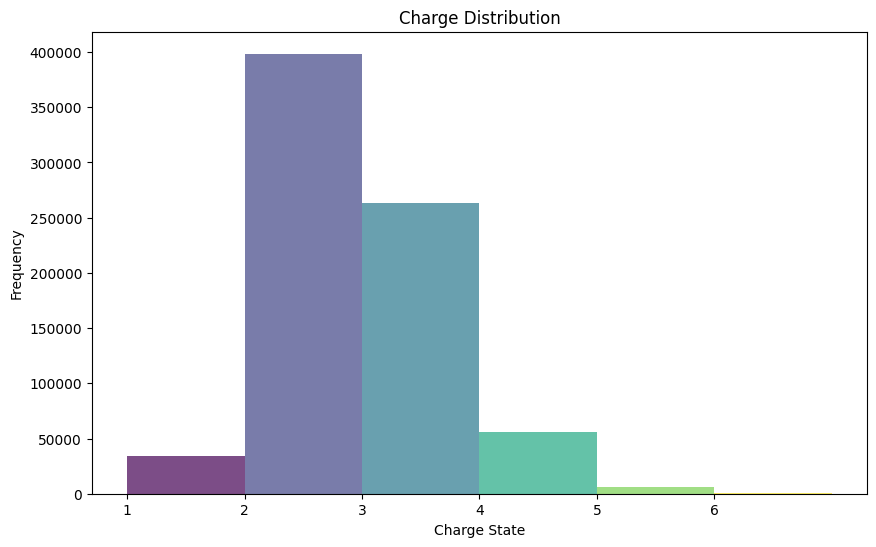

In [14]:
# Number of unique charge states
unique_charges = processed_data['charge_by_max_intensity'].nunique()

# Extracting colors from the 'viridis' colormap
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1, unique_charges)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(processed_data['charge_by_max_intensity'], bins=range(1, max(processed_data['charge_by_max_intensity']) + 2), color='grey', alpha=0.7, label='Charge Distribution')

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel('Charge State')
plt.ylabel('Frequency')
plt.title('Charge Distribution')
plt.xticks(range(1, max(processed_data['charge_by_max_intensity']) + 1))
plt.show()

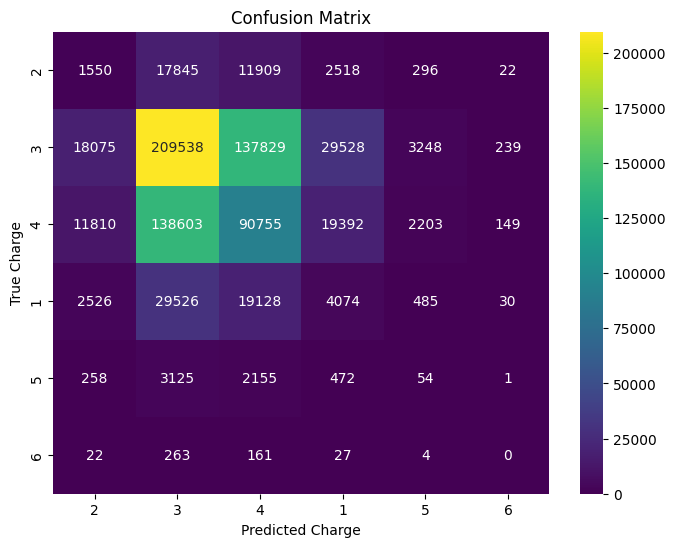

In [15]:
# Generate confusion matrix for biased random predictor
conf_matrix = confusion_matrix(processed_data['charge_by_max_intensity'], processed_data['biased_random_prediction'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=charges, yticklabels=charges)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Charge')
plt.ylabel('True Charge')
plt.show()

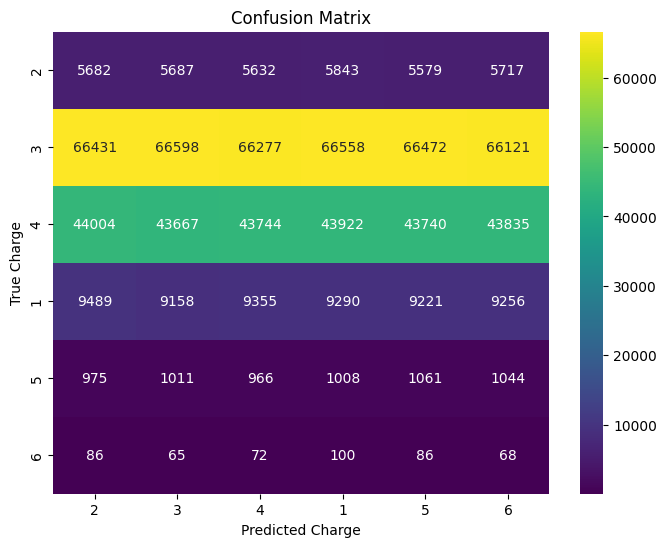

In [16]:
# Generate confusion matrix for random predictor
conf_matrix = confusion_matrix(processed_data['charge_by_max_intensity'], processed_data['random_prediction'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=charges, yticklabels=charges)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Charge')
plt.ylabel('True Charge')
plt.show()